##  **Dissecting Dimensionality Reduction Algorithms**

###**PROBLEM STATEMENT**
Diving Deeper in both Matrix factorization based methods like PCA and  LDA  and Nearest Neighbours based methods like U-MAP and t-SNE. Understanding the intuition, concepts and mathematics behind these algorithms.Understanding when to use one versus another and  evaluate the advantages and disadvantages on each method.Evaluating if the Dimensionality reduction method results in information or variance loss. 

### **INTRODUCTION:**

Organised data of many attributes suffers from curse of dimensionality when we decide to detect similarity and patterns. However Supervised, unsupervised or RL based algorithms can be applied to a dimensionally reduced data and still optimal results can be obtained.Dimension reduction plays an important role in data science, being a fundamental technique in both visualisation and as pre-processing for machine learning

E.g. 

*   NLP is widely using this in terms of mapping similar words into topics to deliver results based on   semantic similarity.
*   Recommender Systems suffer from sparse matrices and hence dimensionality reduction renders a meaningful less dimensional matrix

Data Compression helps us do better in terms of applying algorithms efficiently in memory and speed constraints. Many a times data consists of redundant features or/and related attributes that implies the same information and hence we can get rid of redundant features or compress them using feature engineering that can incorporate information of the data.It is process of selecting subset of features of available variables before applying ML techniques.

#### REASONS: 
*  $True  Dimensionality<<< Observed  Dimensionality$
* Hughes phenomenon suggests that with increase in dimension, predictive power decreases
* Law of Parsimony also favors simpler explanations
* Overfitting is avoided if parsimonious model is chosen
execution time is reduced







#### Popular techniques for  dimensionality reduction :


1.   Pairwise correlation
2.   Multicolinearity
3.   Amount of variation
4.   Amount of missing values
5.   PCA based methods
6.   Cluster Analysis based methods
7.   Forward Selection
8.   Backward Selection
9.   Lasso
10.  Tree Based Methods

Off these techniques first 4 remove redundancy and 5-6 are our topics of focus as they address information retension post dimensionality reduction, the rest methods are embedded based on model of choice


### **OVERVIEW OF BASIC METHODOLOGIES FOR FEATURE SELECTION/ SUBSET SELECTION/DIMENSIONALITY REDUCTION**
1.  MISSING VALUES IN A FEATURE
        If missing values percentage is between 50-95% we dont impute

        If missing values percentage is greater than 95% we discard the variable

        If missing values percentage is less than 50% we impute values


2.  For correlations we check for heavily correlated variables and keep the variable highly correlated with target variable and drop the rest
3.  Multicolinearity



### **STATISTICAL GLOSSARY** 
**SET**: 

A set is a collection of data . E.g.
>$X={ 1, 2, 3, 4, 5, 6}$

**POPULATION**:

The entire set of items of interest for statistical study from which sample is drawn

**SAMPLE**:

A subset of population that is used to infer characteristics of population

**MEAN**: 

The ratio of sum of all observations to the number of observations


>![alt text](https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-08810453160907871072b60a22fdceb7_l3.svg)


**VARIANCE**:

It is the sum of squares of differences between all numbers and means.

>![alt text](https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-fbebf7d86a9acade129c667962f68dce_l3.svg)


**COVARIANCE**:

Covariance is a measure of how much two random variables vary together

>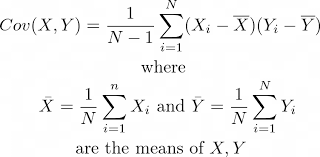

**MANIFOLD**
A manifold is a topological space that locally resembles Euclidean space near each point
>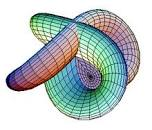


Matrix Factorisation based techniques such as PCA, MDS, Sammon Mapping tend to preserve the distance structure within the data 
KNN based graphical methods like t-SNE, UMAP and ISOMAP however tend to preserve local distances over global distances within data

### **Dataset Description**
We are Going to use Fashion MNIST Dataset that is readily available on keras datasets , it consists of 70000 grayscale images in 10 categories . Each image has resolution of 28*28 pixels. The classes are sneakers, shirts, trousers, bags, pullovers named below with labels represented as integers below:

Label |	Class
--- | ---
0	|T-shirt/top
1	|Trouser
2	|Pullover
3	|Dress
4	|Coat
5	|Sandal
6	|Shirt
7	|Sneaker
8	|Bag
9	|Ankle boot




In [0]:
!pip install tensorflow
!pip install keras
!pip install scikit-learn

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from pylab import *
from sklearn import model_selection, preprocessing
import time
import tensorflow as tf
tf.random.set_seed(1)

import keras
import sys


In [0]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


Using TensorFlow backend.


4423680/4422102 [==============================] - 1s 0us/step


In [0]:
#loop over each class label and sample 100 random images over each label and save the idx to subset
np.random.seed(seed=486)
idx=np.empty(0,dtype="int8")
for i in range(0,len(np.unique(y_train))):
    idx=np.append(idx,np.random.choice(np.where((y_train[0:len(y_train)])==i)[0],100,replace=False))

x_train= x_train[idx]
y_train= y_train[idx]

In [0]:
print(x_train.shape)
print(y_train.shape)
print(np.unique(y_train,return_counts=True))

(1000, 28, 28)
(1000,)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100]))


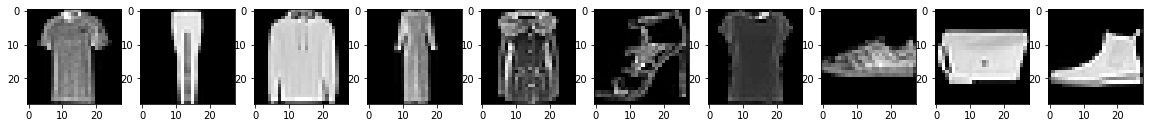

In [0]:
#Visualising samle image of each label
plt.figure(figsize=(20,20))
for i in range(0,len(np.unique(y_train))):
    rmd=np.random.choice(np.where(y_train==i)[0],1)
    plt.subplot(1,10,i+1)
    img=x_train[rmd].reshape(1,28,28,1)
    plt.imshow(img[0,:,:,0],cmap="gray")

### **PCA(Principal Component Analysis)**

When we have more features we require that there are more training examples to enhance performance.
Hence Dimensionalitity reduction can cure such problems:
Assume that a Dataset consists of 2 features X1 and X2 where they can be plotted in 2D Euclidean space, we can reduce it to one if the exhibit any degree of correlation.
><img src="https://i.stack.imgur.com/Q7HIP.gif" width="750" align="center">


The GIF can be summarised as Data distributed in 2 dimensions can be projected to a new axis of choice and hence reduced to one instead of two. PCA is essentially a dimensionality reduction techniques that detects correlation and multicolinearity amongst many features and reduces them to 'n' new features in dimensions orthogonal to each previous dimensions of feature space.
These new feature keep the maximum/desired  variance(spread of the data) of original data with summarizing in compact features with intertwined definitions and aid making similar interpretations and inferences as original data. 
The new features are usually called PCA1, PCA2 , ... and retain the highest variance of the data in decreasing order of their construction. i.e, PCA1 will h retain highest variance in the data and demarcates records/observations from each other most strongly than other PCA engineered features.

PCA also is able to identify hidden constraints of a data as it has fixed policies of reconstructing original features from PCA engineered components.

The new dimension of principal component PCA1 can be Z1 where :
             
>$b_{1}z_{1}= a_{1}x_{1} + a_{2}x_{2}$

Clearly new components are  linear combinations of original features.

We can plot a covariance matrix for all features and do eigenvalue decomposition that results in diagonal matrix of eigenvalues and the eigenvectors corresponding to highest 'n' eigen values are selected as dimensions to represent the feature space into reduced dimensional PCA components




### **IMPLEMENTATION ON FASHION MNIST DATA**

In [0]:
#class names for integers
labels = { 0: 'T-shirt', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 
          5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8 : 'Bag', 9 : 'Ankle boot'}

# Class name containing column
y_class=pd.DataFrame({'Class':y_train})
y_class.replace(labels, inplace=True)


In [0]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x_train.reshape((len(x_train),28*28)))

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

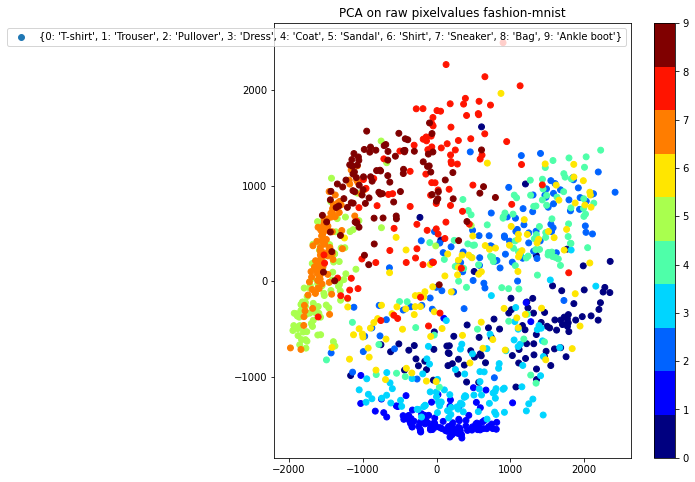

In [0]:
plt.figure(figsize=(8,8))
cmap = cm.get_cmap('jet', 10)
plt.scatter(x=pca.transform(x_train.reshape((len(x_train),28*28)))[:,0],y=pca.transform(x_train.reshape((len(x_train),28*28)))[:,1],c=y_train,label=labels,s=35,cmap=cmap)
plt.title("PCA on raw pixelvalues fashion-mnist")
plt.colorbar()
plt.legend()
plt.show()

### **LDA(Linear Discriminant Analysis)**

This method was developed by Ronald Fisher in 1936 and is used in pattern classification tasks to this day

LDA is a supervised learning dimensionality reduction technique which  maximizes the distance between the centroid/mean of different classes and minimize the deviation of spread within a class. LDA does this by projecting a feature space (a dataset $n$-dimensional samples) onto a smaller subspace $k (where k≤n−1)$ while preserving  the class-discriminatory information.
LDA uses therefore inter- class and intra-classes distances as metrics. Maximizing the distance between  means of various classes while projecting the data in a lower-dimensional space does great job at classification tasks. However this technique does very poorly on anomaly detection type tasks.
LDA requires data to be normalised as it measures various distances and performs really bad in case data is not normalised.
LDA projects data into lowe dimensions that maximise the seperation between the classes  
a cooccurence matrix when undergoes EVD if all eigen values are similar in values represent good distributions. Eigenvalues with higher magnitude are more informative about the data.

Algorithm:


1) Evaluate the $d-dimensional$ mean vectors for the different classes of teh dataset.
2) Compute the scatter matrices (in-between-class and within-class scatter matrix).
3) Compute the eigenvectors $(e_1,e_2,...,e_d)$ and corresponding eigenvalues $(λ_1,λ_2,...,λ_d)$ for the scatter matrices.

4) Sort the eigenvectors by decreasing eigenvalues and choose k eigenvectors with the largest eigenvalues to form a $d×k$ dimensional matrix W (where every column represents an eigenvector).
Use this d×k eigenvector matrix to transform the samples onto the new subspace. This can be summarized by the matrix multiplication: $Y=X×W$ (where X is a n×d-dimensional matrix representing the n samples, and y are the transformed $n×k$-dimensional samples in the new subspace).



In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
ldamodel=lda.fit(x_train.reshape((len(x_train),28*28)),y_train)

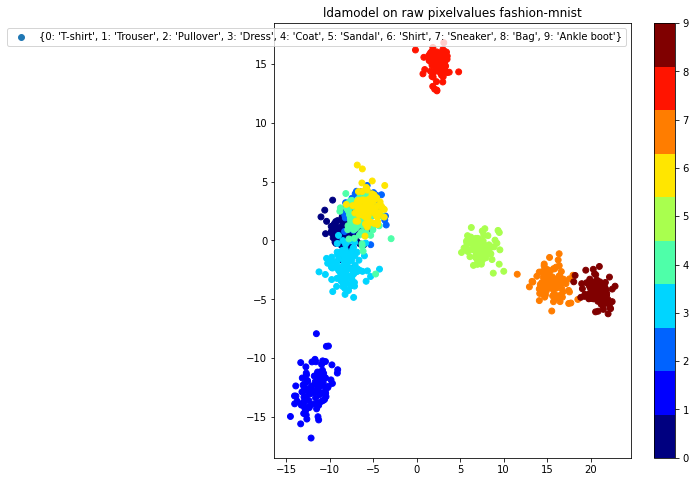

In [0]:
plt.figure(figsize=(8,8))
cmap = cm.get_cmap('jet', 10)
plt.scatter(x=ldamodel.transform(x_train.reshape((len(x_train),28*28)))[:,0],y=ldamodel.transform(x_train.reshape((len(x_train),28*28)))[:,1],c=y_train,label=labels,s=35,cmap=cmap)
plt.title("ldamodel on raw pixelvalues fashion-mnist")
plt.colorbar()
plt.legend()
plt.show()

### **UMAP**

#### Overview:

UMAP stands for Uniform Manifold Approximation and Projection and it is developed using Riemannian geometry and algebraic topology.
It preserves the global structure of data 


#### Advantages:

* UMAP represents global structure better than TSNE and is computationally faster
* UMAP doesn't have any constraints in terms of embedding dimensions


#### Concept

Let input data be 
> $X={X_{1},X_{2},...X_{N}}$

Let M be the manifold we assume the data to lie on, and let g be
the Riemannian metric(simplistically product of immediate surface with immediate tangent) on M. For each point p $\in$ M we have $g_{p}$, an inner
product on the tangent space $T_{p}M$.

We assume data to be uniformly distributed in the Manifold and any randomlly picked ball where $X_{i}$ will contain 'k' specific neighbors. We can find sistances between 2 points based on Lemma 1 [1] 

We make an attempt to adjust the various X_{i} distances on local balls of the manifold by normalising the distances of right nearest neighbours.

The data is further represented mathematically as a fuzzy tpological representation of data $X$ as:

>$\cup_{i=1}^n FinSing((X,d_{i}))$

which is a global representation of data by patching multiple local representations by a fuzzy set union. This incorporates distances of data points on manifold with each other (local nearest neighbours ) 

It further argues that given we find low dimensional representations that match the topological manifold representation, we can achieve dimensionality reduction.

The reduced dimension fuzzy topological representation is achieved by arriving at the parameters that appropriately account for distances between data points and their nearest neighbours.

This approximation is evaluated using cross entropy comparison of the two fuzzy representations of manifold topologies and many optimisation techniques can be used to arrive at reducing this cross entropy loss such as SGD.

In summary ,  We  use manifold approximation and patching together local fuzzy simplicial set representations to construct a topological
representation of the high dimensional data. We then optimize the layout of data
in a low dimensional space to minimize the error between the two topological
representations.

Computationally, We first create a weighted k-neighbour graph using nearest neighbour descent search algorithm[2] and then we create a low dimensional layout of the graph by means of force directed graph layout.
A force directed graph assign forces of attraction /repulsion amongst edges and vertices determined by hyperparameters a and b and the nearness of the 2 data points
attractive force is given as :

>${\frac{-2ab||y_{i}-y_{j}||_{2}^{2(b-1)}}{1+y_{i}-y_{j}||_{2}^{2}}}{w((x_i,x_j))}{(y_i-y_j)}$

where $y_i$ is coordinate of point x_i and w represents weight(nearness) between 2 points 

Repulsive force is given by:

>${\frac{b}{(\epsilon+||y_{i}-y_{j}||_{2}^{2})(1+||y_{i}-y_{j}||_{2}^{2})}}{(1-w((x_i,x_j)))}{(y_i-y_j)}$

where $/epsilon$ is a small number to avoid zero division

#### U-MAP  Hyperparameters :

* n_neighbours: to determine neighbours for local representation eg, 20, 30 etc.
* n_components: resultant low dimensions e.g 2, 3, 4
* metric: distance measure in manifold between points e.g. manhattan, chebyshev
* n_epochs: number of times used to optimise the low dimensional embedding
* learning_rate: for optimisation speed
* init: method of initialising low dimensional embedding 
          'spectral' for fuzzy 1-skeleton
          'random' for random initialisation

* min_dist: minimum distance between embedded points,determines how clustered embeddingds are
* spread: scale of embedded points, determines how clustered embeddingds are
* local_Connectivity: number of local connected nearest neighbors
* repulsion_strength: weights applied to negative samples
* negative_sample_rate: number of negative samples per positive sample.Increasing leads to more repulsion from negative samples than attraction to positive sample resulting in better accuracy in projecting to low dimensions
* transform_queue_size: How aggresive to search for nearest neighbour
* a & b: controls embedding forces. determined by min_dist and  spread if not specified


#### A Brief look at hyperparameters affecting Clusters:

![alt text](https://deeplearn.org/arxiv_files/1802.03426v2/hyperparameters.png)

In [0]:
import umap
model = umap.UMAP( random_state=0)
umapmodel = model.fit_transform(x_train.reshape((len(x_train),28*28)))

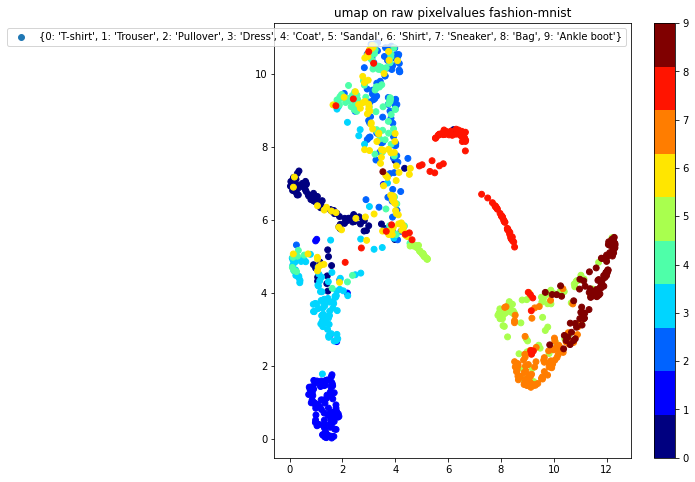

In [0]:
plt.figure(figsize=(8,8))
cmap = cm.get_cmap('jet', 10)
plt.scatter(x=umapmodel[:,0],y=umapmodel[:,1],c=y_train,label=labels, s=35,cmap=cmap)
plt.title("umap on raw pixelvalues fashion-mnist")
plt.colorbar()
plt.legend()
plt.show()

### **TSNE**

t-SNE stands for ( t-Distributed Stochastic Neighbor Embedding). 

t-Distributed Stochastic Neighbor Embedding (t-SNE) is an unsupervised, technique that is used to visualise high- dimensional data in low dimensional spaces using graphical representation of data. It was developed by Laurens van der Maatens and Geoffrey Hinton in 2008. t-SNE is non linear in nature.
t-SNE also preserves local similarity information while visualising data in lowe dimension.

 t-SNE algorithm estimates  a similarity measure between data points in both high dimensional space and  low dimensional space. It further optimizes these  similarity measures using a cost function.

 For each data instance $(x_i)$  a Gaussian distribution is centered over that point. Then we measure the density of all points $(xj)$ under that Gaussian distribution and  renormalize for all points. This gives us a set of probabilities $(Pij)$ for all points which are proportional to the similarities. It is implied that  if data points x1 and x2 have equal values under a  gaussian circle then their  respective proportions and similarities are equal and hence they are  locally similar in the high-dimensional. The Gaussian distribution or circle is controlled  using  perplexity, which controls  the variance of the distribution (circle size) and  number of nearest neighbors to be considered.  Perplexity is usually in range 5 and 50


Further the Gaussian distribution is replaced wit a  Student t-distribution with one degree of freedom popularly  known as the Cauchy distribution That gives us a second set of probabilities $(Qij)$ in the low dimensional structure. the  Student t-distribution has heavier tails than the normal distribution. The heavier tails aids is appropriate modeling of data points at farther distances from each other.

As we aim to match  probabilities  of nearness in low-dimensional space $(Qij)$ to that high dimensional space $(Pij)$ we use estimator for identifying amount of difference between the probability distributions of the two-dimensional spaces using Kullback-Liebler divergence (KL). We use gradient descent to minimize our KL loss between the two distributions of probability estimates in lower and higher dimensional space.
TSNE is heavily used in Sentiment analysis, Classification problems, Anomaly detection problems

Hyperparameters in TSNE:
1) n_components: Dimension of reduced space

2) perplexity: Number of nearest neighbours to use learning algorithms

3) learning rate: lowe learning rate helps achieve better clusters and aims at retaining local structure/neighbour better

4) n_iter: epoches for optimisations

5) init: initialise the embeddings of probabilities 

6) method: approximate optimisation algorithms choices to optimise KL loss

7)angle: tradeoff between speed and accuracy 0.2-0.8 where lower angle has high computation time and less error 






In [0]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
tsne = model.fit_transform(x_train.reshape((len(x_train),28*28)))

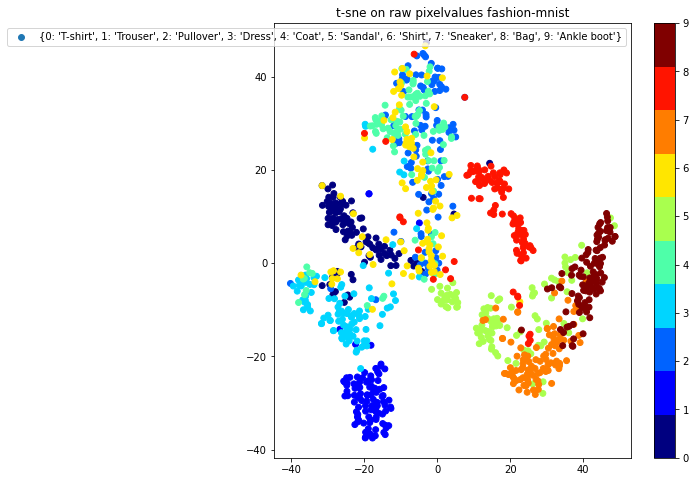

In [0]:
plt.figure(figsize=(8,8))
cmap = cm.get_cmap('jet', 10)
plt.scatter(x=tsne[:,0],y=tsne[:,1],c=y_train,label=labels,s=35,cmap=cmap)
plt.title("t-sne on raw pixelvalues fashion-mnist")
plt.colorbar()
plt.legend()
plt.show()

### **INFERENCE**
Matrix factorisation based methods like PCA , LDA preserve information in terms of largest variance between data points in a data this is highly beneficial to predict patterns and forecast information on compressed feature space. Methods like UMAP, TSNE etc are very useful in retaining local information and outperform in classification based tasks and aid better visualise data in terms of segments and deduce patterns.
Matrix factorisation based methods like PCA also aid to find hidden constraints of a Data and elaborate on inferencing attribute information as they hold linear relationship with respect to original data.
We can arrive at many inferences from matrix factorisation based methods on significance of attributes and their impact on forecasts and classifications.
Observed from the graphs however Nearest neighbour based algorithms outperforms matrix factorisation based methods in classification tasks


### **CONTRIBUTION:**
The interpretations and content rely heavily on references cited below however explanations are constructed by self.
The code is adapted and modified to fit our use case to show differences in plots by different algorithms.

### **REFERECES**
1)McInnes, L., & Healy, J. (2018). UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction. ArXiv e-prints.

2) Wei Dong, Charikar Moses, and Kai Li. Ecient k-nearest neighbor graph
construction for generic similarity measures. In Proceedings of the 20th International Conference on World Wide Web, WWW ’11, pages 577–586, New
York, NY, USA, 2011. ACM.

3)STANDARD DEVIATION: 
https://en.wikipedia.org/wiki/Standard_deviation

4)COVARIANCE:
https://en.wikipedia.org/wiki/Covariance


5)J Peter May. Simplicial objects in algebraic topology, volume 11. University
of Chicago Press, 1992.

6)PCA Easy illustrations:
https://ourarchive.otago.ac.nz/bitstream/handle/10523/7534/OUCS-2002-12.pdf?sequence=1&isAllowed=y

7)PCA image:
https://i.stack.imgur.com/Q7HIP.gif

8) van der Maaten, L.J.P.; Hinton, G.E. Visualizing High-Dimensional Data
Using t-SNE. Journal of Machine Learning Research 9:2579-2605, 2008.

9)https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

10) https://sebastianraschka.com/Articles/2014_python_lda.html




### **QUIZ**
State true/ False with reason

1) PCA is a dimensionality reduction technique that selects best features from feature space
A. False, PCA creates new features that retain as desired variance of original dataset. The first principal component has most variance of original data 

2) UMAP is based on preserving local neighbourhood of a data point to arrive at global representation.
A. True . UMAP imagines Data in manifold structure and obtains global structure using attractive and repulsive forces of k nearest neighbours 

3) PCA preserves local neighbourhood information in data.
A. False. PCA preserves information of largest variances very efficiently, Data points which are farthest to each other( most dissimilar appear farthest.

4) In t-SNE we use Gaussian distance to estimate probability of closeness of datapoints

A. False We use t- distribution (For plotting in lower dimension)as this has heavier tail which aids to plot points that are far away with better estimates in lower dimension

5) PCA results in uncorrelated feature space

A. True, the eigenvector spaces of reduced feaures are all orthogonal to each other.

6) The "n" PCA are obtained by eigenvalue decomposition of co-occurence matrix of original data and the most important eigenvectors are Principal components selected

A. True, their importance is given by corresponding eigen values. We can use variation ratio from diagonal eigen values to choose n eigen values(descending in absolute magnitude) to match expected variance of original data

7) LDA is unsupervised technique and non-linear 

A) False LDA is supervised dimensionality reduction technique that specifically does linear transformations based on maximising inter class centroid distances and minimising intra class datapoints distance differences

8) LDA always outperforms PCA in classification tasks

A) False. One may be better than other depending on nature of problem

9) Feature selection can be done with lasso regularisation as well
A) True 

10) Feature Selection/ Dimensionality reduction can be done only before a model is applied to data

A) False Features can be selected before a ml model is applied(filter methods), as models are applied(embedded) or after model is applied (wrapper)






### **LICENSE**

MIT License

Copyright (c) 2020 Suprita Ganesh

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
